In [ ]:
import os

import joblib
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC, LinearSVC

from src.dataset_factory import DatasetFactory
from src.experiment_runner import ExperimentRunner

In [2]:

factory = DatasetFactory()
df = factory.create_ml_dataset('master_ml')


Generando dataset ML para experimento: master_ml...
Dataset ML guardado en data/experiments/master_ml/dataset_ml.csv


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], df['journal'], test_size=0.2, stratify=df['journal'], random_state=42
)

runner = ExperimentRunner()
max_features = 3000

In [4]:
rf_pipe = ImbPipeline([
    ('tfidf', TfidfVectorizer(max_features=max_features)),
    ('smote', SMOTE()),
    ('clf', RandomForestClassifier(n_estimators=100))
])
runner.run('RF_Tfidf_Smote', rf_pipe, X_train, X_test, y_train, y_test)


>>> Iniciando Experimento: RF_Tfidf_Smote
Modelo guardado en: results/experiments\RF_Tfidf_Smote\RF_Tfidf_Smote_model.joblib
Resultados guardados en: results/experiments\RF_Tfidf_Smote


'                                                            precision    recall  f1-score   support\n\n                                      1 Applied Ergonomics       0.94      0.89      0.92       225\n                                         2 Neural Networks       0.77      0.40      0.52       493\n                        3 Expert Systems with Applications       0.78      0.81      0.80      2049\n4 Journal of Visual Communication and Image Representation       0.51      0.33      0.40       227\n                                     5 Pattern Recognition       0.51      0.65      0.58       904\n                         6 Robotics and Autonomous Systems       0.71      0.76      0.73       168\n\n                                                  accuracy                           0.70      4066\n                                                 macro avg       0.70      0.64      0.66      4066\n                                              weighted avg       0.71      0.70      0

In [5]:
svm_pipe = ImbPipeline([
    ('tfidf', TfidfVectorizer(max_features=max_features)),
    ('smote', SMOTE()),
    ('clf', LinearSVC(class_weight='balanced'))
])
runner.run('SVM_Linear_Smote', svm_pipe, X_train, X_test, y_train, y_test)


>>> Iniciando Experimento: SVM_Linear_Smote
Modelo guardado en: results/experiments\SVM_Linear_Smote\SVM_Linear_Smote_model.joblib
Resultados guardados en: results/experiments\SVM_Linear_Smote


'                                                            precision    recall  f1-score   support\n\n                                      1 Applied Ergonomics       0.93      0.96      0.94       225\n                                         2 Neural Networks       0.48      0.60      0.53       493\n                        3 Expert Systems with Applications       0.87      0.73      0.79      2049\n4 Journal of Visual Communication and Image Representation       0.30      0.49      0.37       227\n                                     5 Pattern Recognition       0.53      0.54      0.53       904\n                         6 Robotics and Autonomous Systems       0.66      0.80      0.72       168\n\n                                                  accuracy                           0.67      4066\n                                                 macro avg       0.63      0.68      0.65      4066\n                                              weighted avg       0.71      0.67      0

In [6]:
svm_rbf_pipe = ImbPipeline([
    ('tfidf', TfidfVectorizer(max_features=max_features)),
    ('smote', SMOTE()),
    ('clf', SVC(kernel='rbf', class_weight='balanced'))
])
runner.run('SVM_RBF_Smote', svm_rbf_pipe, X_train, X_test, y_train, y_test)


>>> Iniciando Experimento: SVM_RBF_Smote
Modelo guardado en: results/experiments\SVM_RBF_Smote\SVM_RBF_Smote_model.joblib
Resultados guardados en: results/experiments\SVM_RBF_Smote


'                                                            precision    recall  f1-score   support\n\n                                      1 Applied Ergonomics       0.95      0.93      0.94       225\n                                         2 Neural Networks       0.68      0.48      0.56       493\n                        3 Expert Systems with Applications       0.81      0.87      0.84      2049\n4 Journal of Visual Communication and Image Representation       0.65      0.34      0.45       227\n                                     5 Pattern Recognition       0.59      0.67      0.63       904\n                         6 Robotics and Autonomous Systems       0.79      0.67      0.73       168\n\n                                                  accuracy                           0.74      4066\n                                                 macro avg       0.74      0.66      0.69      4066\n                                              weighted avg       0.74      0.74      0

In [7]:
nb_pipe = ImbPipeline([
    ('tfidf', TfidfVectorizer(max_features=max_features)),
    ('smote', SMOTE()),
    ('clf', MultinomialNB())
])

runner.run('Naive_Bayes_Tfidf', nb_pipe, X_train, X_test, y_train, y_test)


>>> Iniciando Experimento: Naive_Bayes_Tfidf
Modelo guardado en: results/experiments\Naive_Bayes_Tfidf\Naive_Bayes_Tfidf_model.joblib
Resultados guardados en: results/experiments\Naive_Bayes_Tfidf


'                                                            precision    recall  f1-score   support\n\n                                      1 Applied Ergonomics       0.84      0.98      0.90       225\n                                         2 Neural Networks       0.55      0.56      0.55       493\n                        3 Expert Systems with Applications       0.91      0.65      0.76      2049\n4 Journal of Visual Communication and Image Representation       0.28      0.69      0.40       227\n                                     5 Pattern Recognition       0.50      0.55      0.53       904\n                         6 Robotics and Autonomous Systems       0.53      0.86      0.65       168\n\n                                                  accuracy                           0.65      4066\n                                                 macro avg       0.60      0.72      0.63      4066\n                                              weighted avg       0.72      0.65      0

In [8]:
lr_pipe = ImbPipeline([
    ('tfidf', TfidfVectorizer(max_features=max_features)),
    ('smote', SMOTE()),
    ('clf', LogisticRegression(multi_class='ovr', max_iter=1000))
])

runner.run('Logistic_Regression_Tfidf', lr_pipe, X_train, X_test, y_train, y_test)


>>> Iniciando Experimento: Logistic_Regression_Tfidf


C:\Users\Gabri\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Modelo guardado en: results/experiments\Logistic_Regression_Tfidf\Logistic_Regression_Tfidf_model.joblib
Resultados guardados en: results/experiments\Logistic_Regression_Tfidf


'                                                            precision    recall  f1-score   support\n\n                                      1 Applied Ergonomics       0.91      0.98      0.94       225\n                                         2 Neural Networks       0.51      0.66      0.58       493\n                        3 Expert Systems with Applications       0.89      0.73      0.80      2049\n4 Journal of Visual Communication and Image Representation       0.30      0.59      0.40       227\n                                     5 Pattern Recognition       0.57      0.55      0.56       904\n                         6 Robotics and Autonomous Systems       0.67      0.84      0.74       168\n\n                                                  accuracy                           0.69      4066\n                                                 macro avg       0.64      0.72      0.67      4066\n                                              weighted avg       0.73      0.69      0

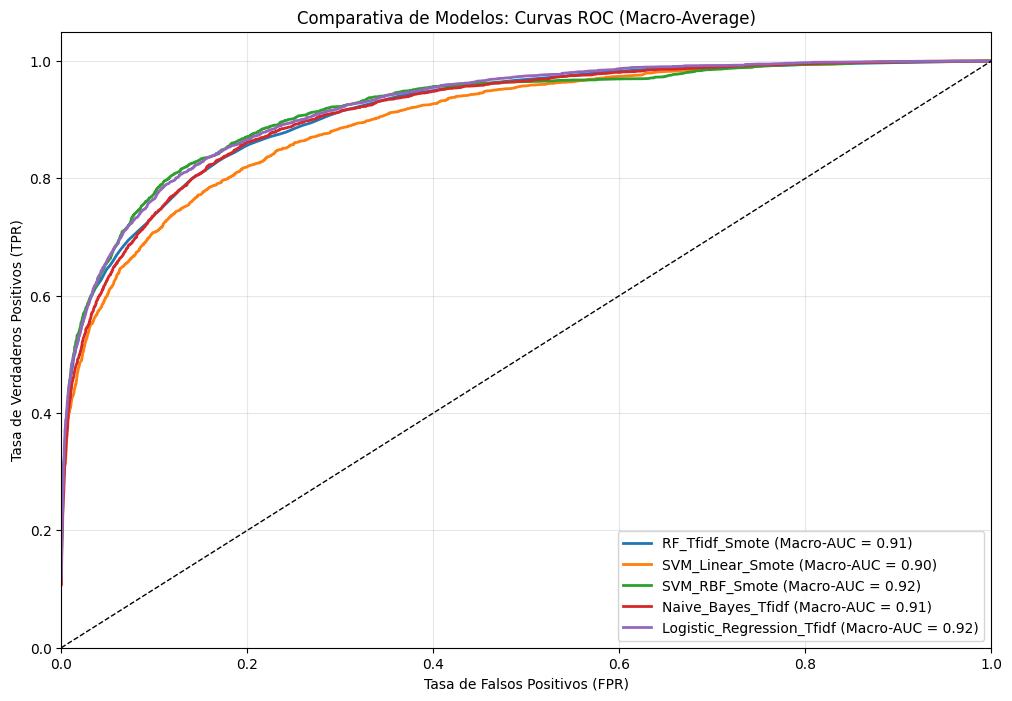